# Modelling population turnover

In our previous SIR model, we have assumed a closed population, i.e. one where no one dies and no babies are born. In terms of the epidemic dynamics, that has meant that as more and more people become infected and recovered, the pool of susceptibles continually decreases, and thus so too does the effective reproduction number. This is fine for diseases with short infectious periods, that spread through a population more quickly than the population is able to renew itself. But what about longer timescales? In this etivity, we want to incorporate births and deaths into the basic SIR model. The structure for this model looks like this:

<img src="Graphics and Data/w4_nb1_model_diagram.png">

### Question: Write down the differential equations for this model on paper. What are the underlying assumptions regarding births and deaths?

Then, copy-paste the SIR model code you have developed before, and extend it to capture this population turnover process. In the first instance, we are looking at an acute disease epidemic introduced into a fully susceptible human population. The infection and recovery rates are 0.4 and 0.2 days$^{-1}$ respectively. We can calculate the background mortality rate based on the average human lifespan - let's assume that this is 70 years, so *mu* = 1/70 years$^{-1}$, or 1/(70x365) days$^{-1}$. In this example, we are also assuming that the population size stays constant over time at 10$^{6}$ - to achieve that, we set the birth rate b = *mu*.

Code this model and run it first for 1 year, and **plot only the number of infected people over time** at this point. Confirm that you observe your regular SIR epidemic curve before proceeding. 

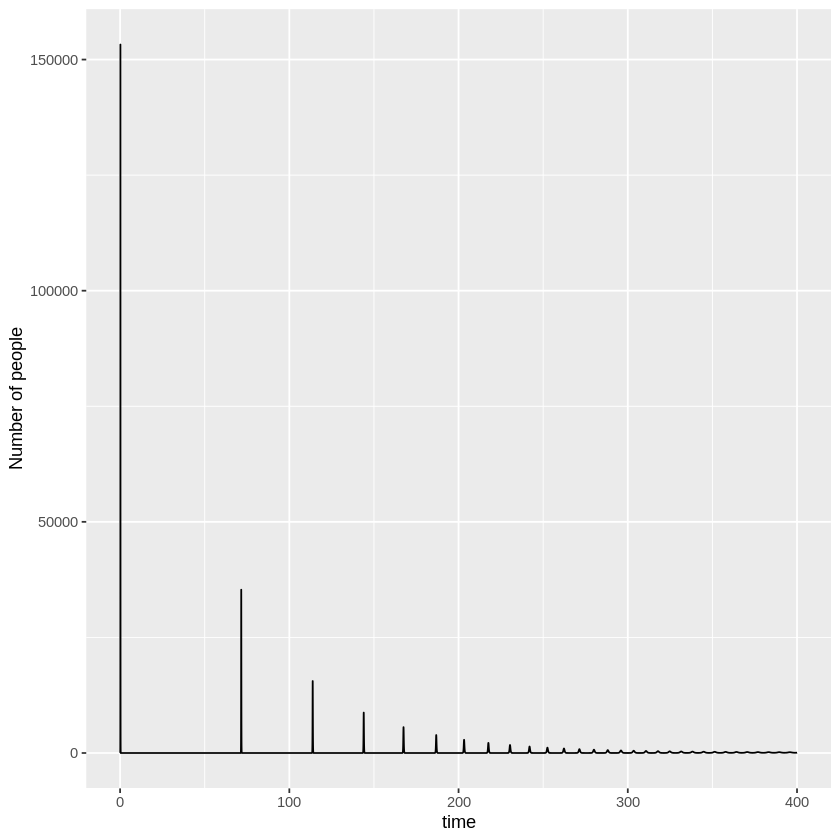

In [14]:

library(deSolve)
library(reshape2)
library(ggplot2)

Initial_number_suscepted=999999
Initial_number_infected=1
Initial_number_recovered=0

Initial_states<-c(S=Initial_number_suscepted,I=Initial_number_infected,R=Initial_number_recovered)
parameters <- c(beta = 0.4*365,      # the infection rate, which acts on susceptibles
                gamma = 0.2*365,     # the rate of recovery, which acts on those infected
                miu = 1/70,           # the background mortality rate, which acts on every compartment
                b = 1/70)


### YOUR CODE GOES HERE ###

# TIMESTEPS:
#timestep<- seq(from=0,to=365,by=1)
timestep <- seq(from = 0, to = 400, by = 2/365)


### YOUR CODE GOES HERE ###

# SIR MODEL FUNCTION 
# We are renaming this to sir_model. 
# Remember to include the input arguments, 
# differential equations and output objects here.

sir_model <- function(timestep,Initial_states,parameters)
    {
    
    with(as.list(c(Initial_states,parameters)),
    {
        lambda <- beta * I/1000000
        dS<- -(lambda*S)-(miu*S)+(miu*1000000)
        dI<- (lambda*S)-(gamma*I)-(miu*I)
        dR<- (gamma*I)-(miu*R)
        
    
    
    return(list(c(dS,dI,dR)))
    })
    
}


output <- as.data.frame(ode(y = Initial_states,
                            times = timestep, 
                            func = sir_model,
                            parms = parameters))
#output_long<- melt(as.data.frame(output),id="time")
ggplot(data=output,
      aes(x=time,
         y=output$I,
         ))+
         geom_line()+
         xlab("time")+
         ylab("Number of people")





Now, change the duration of the model run to several generations, for example 400 years. 

**A note on timesteps:**  
So far, we have only modelled short-term disease dynamics, where it was intuitive to express the timesteps in units of days. In this example, the simulation timescale is much longer, so it might be easier to change the units to years (although the result is also correct if we model 400 years as 146000 days). Now, we need to start thinking about the **interval** of the timesteps, in the code below.

In [ ]:
times <- seq(from = 0, to = 400, by = 1/365)   # from 0 to 400 YEARS in DAILY intervals

Before investigating the disease dynamics, play around with the timesteps at which you are solving the model in your code above and plot the output. In the cell below, it is daily - also try solving it only at every 2, 3, 4 and 5 days. Keep in mind that as we are running the model for longer now, it might take your computer longer to produce the output. 

### Question: How does changing the interval of the timesteps to solve the model at influence the output? Does the plot look correct in each case? If not, at what resolution of timesteps do you get erroneous results, and why?

Finally, run and plot the number of infected people again with the timestep that seems most sensible based on your findings, to study the long-term disease dynamics. 

### Question: What do you observe about the long-term disease dynamics under these assumptions? Can you explain why this pattern occurs based on what you have learnt in the last weeks?

Now make a plot that also shows the number of susceptible and recovered individuals, as a proportion of the total population.

### Question: Does this confirm your hypothesis? Also think about how it relates to the effective reproduction number.

In [ ]:
# Plotting the prevalence of S, I and R over time 

### YOUR CODE GOES HERE ###

In the second example, we are modelling a similar acute disease, but this time we are changing the mortality and birth rates to represent a population with a much more rapid turnover. The infection parameters are the same as before, but we are assuming the average lifespan is 4 weeks this time.

Code this scenario below and run the model for 1 year, and plot the prevalence of susceptibility, infection and recovery over time.

### Question: How do the disease dynamics compare to the previous example? Why does this occur (what is different compared to the disease in the human population)?

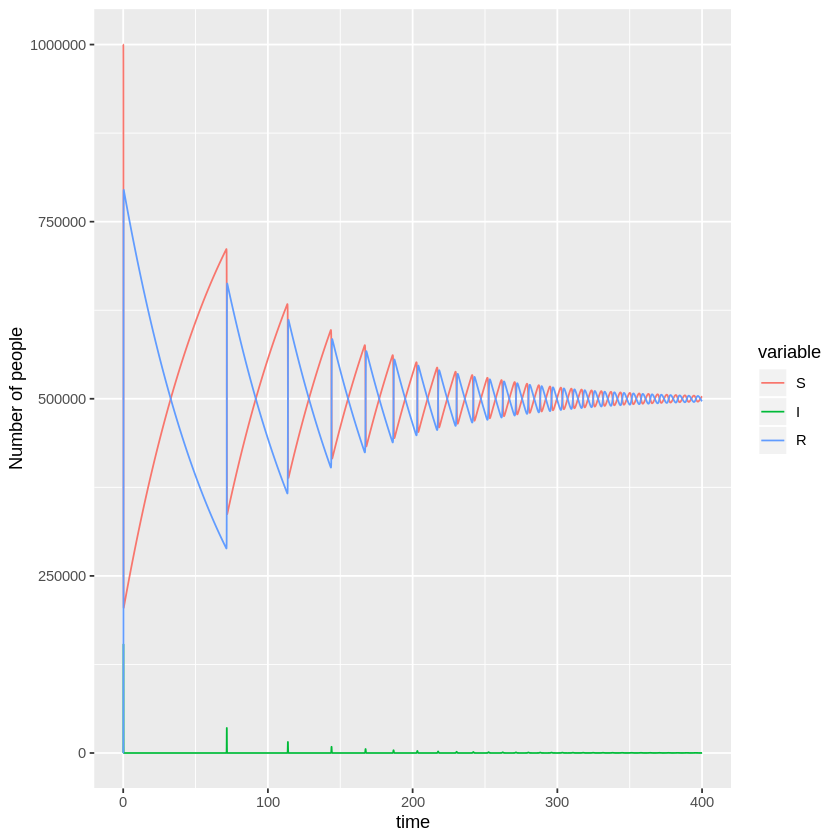

In [15]:
### YOUR CODE GOES HERE ###

output_long<- melt(as.data.frame(output),id="time")
ggplot(data=output_long,
      aes(x=time,
         y=value,
         colour=variable,
         group=variable))+
         geom_line()+
         xlab("time")+
         ylab("Number of people")

## Additional questions

The examples we have modelled here can be compared to real-world diseases. An acute disease that causes a pattern of epidemic cycles in human populations like in the first example is measles. The second example on the other hand is more comparable to endemic swine flu on pig farms, where pigs enter and leave the farm in a matter of weeks (hence the 'average lifespan' that you modelled, of 4 weeks).

However, the basic SIR model is very simple and does not account for many of the factors that can affect disease dynamics in reality. For example, measles notifications data from the pre-vaccination era suggest that epidemic oscillations did not flatten out over time like in our model. This tells us that there are other processes that sustain these cycles, that we have not included in the model. 

### Question: Can you think of other drivers for epidemic cycles?

This etivity was also your first look at a simple demographic process with births and deaths. As you might have noticed, the population size in this example stayed constant over time. However, if we were to model the demography of a country over time, an increasing population size is usually more realistic. 

### Question: How would you change the birth and death rate to model a growing population? What other factors could drive population growth?

In this etivity, we also made the assumption that all babies are born susceptible. Of course, this is not always the case in reality: maternal antibodies can confer immunity to newborns, neonatal vaccination can make newborns immune to infection, and some infections can be transmitted from mothers to their children, like HIV. 

### Question: How would you adapt the differential equations to model a disease where a proportion *p* of babies born to infected mothers are infected at birth? Write them out on paper.

**As always, you can find the solutions file in the "Solutions" folder.**